In [2]:
import numpy as np

import jiant.utils.python.io as py_io
import matplotlib.pyplot as plt

In [222]:
pparam = dict(xlabel='', ylabel='Evaluation Acc (\%)')

task_names1 = [
  "lexical-entail", "transitive", "hypernymy", "hyponymy",
  "verbnet", "verbcorner", "synt-alt", "synt-var",
  "boolean", "comparative", "conditional","counting",
  "monotonicity", "syllogism", "negation", "quantifier",
]

task_names2 = [ "kg-relation",  "sentiment",
  "puns", "coreference", "sprl", "context-align",
  "proofwriter", "entail-tree", "atomic", "socialqa",
  "physicalqa", "social-chem", "logiqa", "drop", "cosmoqa",
  "ester", "spatia-tempo", "numeric", "counterfactual"
]

task_names3 = [
  "atomic", "socialqa", "physicalqa",
  "social-chem", "logiqa", "drop", "cosmoqa",
  "ester", "spatia-tempo", "numeric", "counterfactual"
]

lexical_tasks = ["lexical-entail", "transitive", "hypernymy", "hyponymy"]
syntactic_tasks = ["verbnet", "verbcorner", "synt-alt", "synt-var"]
semantic_tasks = ["kg-relation",  "sentiment", "puns",
                  "context-align", "coreference", "sprl"]
logical_taasks = ["boolean", "comparative", "conditional", "counting",
                  "negation", "quantifier", "monotonicity", "syllogism"]
commonsense_tasks = ["atomic", "socialqa", "physicalqa", "social-chem"]
knowledge_tasks = ["proofwriter", "entail-tree"]
comprehension_tasks = ["logiqa", "drop", "cosmoqa", "ester"]

curriculum_tasks= [
  lexical_tasks, syntactic_tasks,
  semantic_tasks, logical_taasks,
  commonsense_tasks, knowledge_tasks,
  comprehension_tasks]

In [223]:
common_nli = py_io.read_json("./runs/zero-shot/anli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}
print(common_nli)

name_convert = {
  "monotonicity": "monotonicity_infer",
  "lexical-entail": "lexical",
  "synt-alt": "syntactic_alternation",
  "kg-relation": "kg_relations",
  "context-align": "context_align",
  "entail-tree": "entailment_tree",
  "social-chem": "social_chem",
  "synt-var": "syntactic_variation",
}

def read_accuracy(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]
      acc_list.append(acc)
    else:
      acc_list.append(0)
  return acc_list

acc_list1_anli = read_accuracy(task_names1)
acc_list2_anli = read_accuracy(task_names2)
acc_list3_anli = read_accuracy(task_names3)

acc_anli_category = [read_accuracy(category) for category in curriculum_tasks]
acc_anli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_anli_category]

{'lexical': 98.04719283970708, 'boolean': 75.6, 'comparative': 45.1, 'conditional': 66.3, 'counting': 67.2, 'negation': 69.0, 'quantifier': 59.1, 'transitive': 70.77833409194356, 'hypernymy': 50.023529411764706, 'hyponymy': 50.03529411764706, 'verbcorner': 42.140492298834026, 'verbnet': 58.125, 'ner': 81.20333333333333, 'coreference': 70.90877737540956, 'puns': 51.70842824601367, 'sentiment': 68.83333333333333, 'monotonicity_infer': 53.98266052560282, 'syntactic_alternation': 71.5034965034965, 'syntactic_variation': 62.990196078431374, 'kg_relations': 88.17345597897503, 'context_align': 52.361840074096946, 'sprl': 62.07058823529412, 'social_chem': 51.105476673427994, 'atomic': 52.599286033020974, 'socialqa': 65.20073296684991, 'logiqa': 53.533026113671276, 'entailment_tree': 46.029411764705884, 'cosmoqa': 49.00953778429934, 'syllogism': 76.19310344827586, 'ester': 62.876254180602004, 'physicalqa': 50.272034820457016}


In [224]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list1_mnli = read_accuracy(task_names1)
acc_list2_mnli = read_accuracy(task_names2)
acc_list3_mnli = read_accuracy(task_names3)

acc_mnli_category = [read_accuracy(category) for category in curriculum_tasks]
acc_mnli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [225]:
common_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list1_xlnet = read_accuracy(task_names1)
acc_list2_xlnet = read_accuracy(task_names2)
acc_list3_xlnet = read_accuracy(task_names3)

acc_xlnet_category = [read_accuracy(category) for category in curriculum_tasks]
acc_xlnet_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [226]:
common_nli = py_io.read_json("./runs/curriculum/roberta-base/val_metrics.json")

def read_accuracy_jiant(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['metrics']['major']
      acc_list.append(acc*100)
    else:
      print(name)
      acc_list.append(0)
  return acc_list

acc_list1_glue = read_accuracy_jiant(task_names1)
acc_list2_glue = read_accuracy_jiant(task_names2)
acc_list3_glue = read_accuracy_jiant(task_names3)

acc_glue_category = [read_accuracy_jiant(category) for category in curriculum_tasks]
acc_glue_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_glue_category]

proofwriter
drop
spatia-tempo
numeric
counterfactual
drop
spatia-tempo
numeric
counterfactual
proofwriter
drop


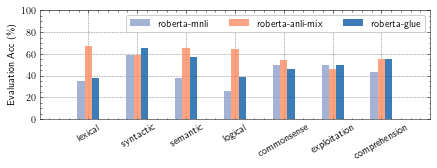

In [227]:
curriculum_category = [
  "lexical", "syntactic", "semantic",
  "logical", "commonsense",
  "exploitation",
  "comprehension"]
x = np.arange(len(curriculum_category))

width = 0.15
label = ["10", "1k"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(7, 2))
  ax = fig.add_subplot(111)

  #ax.bar(x - width*2, acc_mnli_avg, width, label=label[0], alpha=0.8)
  ax.bar(x - width, acc_mnli_avg, width, label=label[0], color="#8da0cb", alpha=0.8)
  ax.bar(x, acc_anli_avg, width, label=label[1], color="#fc8d62", alpha=0.8)
  ax.bar(x + width, acc_glue_avg, width, label=label[2], alpha=0.8)
  #ax.bar(x + width*2, acc_anli_avg, width, label=label[2], alpha=0.8)

  ax.set_xticks(x)
  plt.xticks(rotation = 30)
  ax.set_xticklabels(curriculum_category)
  #ax.set_title('Curriculum Benchmark')
  ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 7])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_avg.pdf')

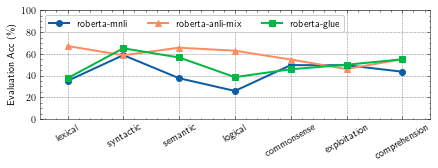

In [175]:
curriculum_category = [
  "lexical", "syntactic", "semantic",
  "logical", "commonsense",
  "exploitation",
  "comprehension"]
x = np.arange(len(curriculum_category))

width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(7, 2))
  ax = fig.add_subplot(111)
  ax.plot(x, acc_mnli_avg, 'o-', label=label[0], linewidth=2)
  ax.plot(x, acc_anli_avg, '^-', label=label[1], color="#fc8d62", linewidth=2)
  ax.plot(x, acc_glue_avg, 's-', label=label[2], linewidth=2)

  ax.set_xticks(x)
  plt.xticks(rotation = 30)
  ax.set_xticklabels(curriculum_category)
  ax.legend(loc="upper left", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, 6.5])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

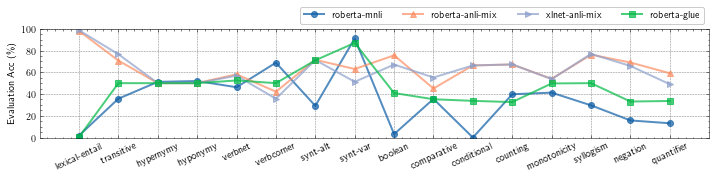

In [254]:
x = np.arange(len(task_names1))
width = 0.15
label = ["roberta-mnli", "roberta-anli-mix", "xlnet-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  #ax.bar(x - (width), acc_list1_mnli, width, label=label[0], alpha=0.7, color="#8da0cb")
  #ax.bar(x, acc_list1_anli, width, label=label[1], alpha=0.7,  color="#fc8d62")
  #ax.bar(x + (width), acc_list1_glue, width, label=label[2], alpha=0.7, )
  ax.plot(x, acc_list1_mnli, 'o-', label=label[0], alpha=0.7, linewidth=2)
  ax.plot(x, acc_list1_anli, '^-', label=label[1], alpha=0.7, color="#fc8d62", linewidth=2)
  ax.plot(x, acc_list1_xlnet, '>-', label=label[2], alpha=0.7, color="#8da0cb", linewidth=2)
  ax.plot(x, acc_list1_glue, 's-', label=label[3], alpha=0.7, linewidth=2)

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names1)
  #ax.set_title('Curriculum Benchmark')
  ax.legend(loc="upper right", ncol=4, bbox_to_anchor=(1, 1.25))
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 16])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_1.pdf')

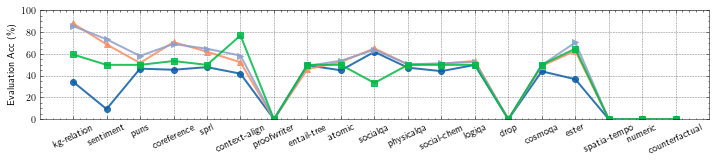

In [237]:
x = np.arange(len(task_names2))

with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  #ax.bar(x - (width), acc_list2_mnli, width, label=label[0], alpha=0.7, color="#8da0cb")
  #ax.bar(x, acc_list2_anli, width, label=label[1], alpha=0.7,  color="#fc8d62")
  #ax.bar(x + (width), acc_list2_glue, width, label=label[2], alpha=0.7, )
  ax.plot(x, acc_list2_mnli, 'o-', label=label[0], alpha=0.85, linewidth=2)
  ax.plot(x, acc_list2_anli, '^-', label=label[1], alpha=0.85, color="#fc8d62", linewidth=2)
  ax.plot(x, acc_list2_xlnet, '>-', label=label[2], alpha=0.85, color="#8da0cb", linewidth=2)
  ax.plot(x, acc_list2_glue, 's-', label=label[3], alpha=0.85, linewidth=2)

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names2)
  #ax.set_title('Curriculum Benchmark')
  #ax.legend(title='Label', loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1.2))
  #ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 19])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_2.pdf')

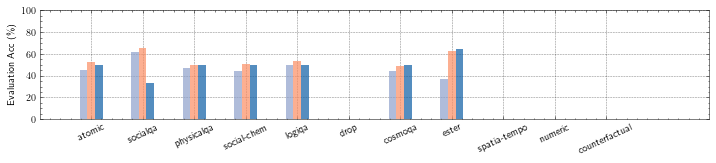

In [183]:
x = np.arange(len(task_names3))
width = 0.15
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  ax.bar(x - (width), acc_list3_mnli, width, label=label[0], alpha=0.7, color="#8da0cb")
  ax.bar(x, acc_list3_anli, width, label=label[1], alpha=0.7,  color="#fc8d62")
  ax.bar(x + (width), acc_list3_glue, width, label=label[2], alpha=0.7, )

  ax.set_xticks(x)
  plt.xticks(rotation = 25)
  ax.set_xticklabels(task_names3)
  # ax.set_title('Curriculum Benchmark')
  # ax.legend(title='Label', loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1.2))
  #ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 12])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_3.pdf')